# 02. Neural Network classification with PyTorch

Classification is a problem of predicting wether something is one thing or another (there can be multiple things as the options)

## 1. Make classification data and get it ready

In [467]:
import sklearn

In [468]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [469]:
len(X), len(y)

(1000, 1000)

In [470]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [471]:
# Make a DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})

circles[: 10]

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [472]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

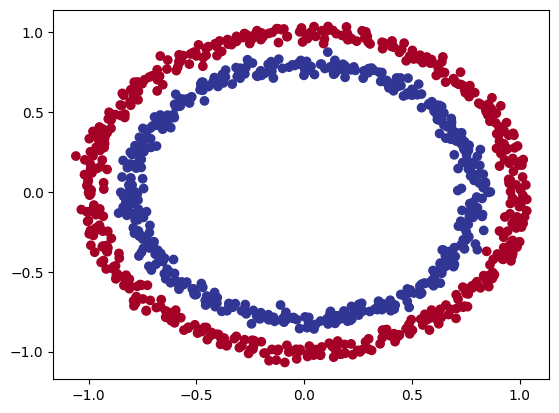

In [473]:
# Visualize, visualize, visualize!
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

**Note:** The data we're working with is often reffered to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

### 1.1 Check input and output shapes

In [474]:
X.shape, y.shape

((1000, 2), (1000,))

In [475]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [476]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample}, and the for y: {y_sample}")
print(f"Shapes for one samples of X: {X_sample.shape}, and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074], and the for y: 1
Shapes for one samples of X: (2,), and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [477]:
import torch
from torch import nn  # nn contains all of PyTorch's building block for neural networks

In [478]:
type(X)

numpy.ndarray

In [479]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [480]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [481]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 0.2 = 20% of data will be test & 80% will be train
                                                    random_state=42)

In [482]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Let's build a model to classify our blue and red dots

To do so, we want to:

1. Setup device agnostic code so our code will run on an acceletator (GPU) if there is one
2. Construct a model (by subclassing `nn.Module`)
3. Defining a loss function and optmizer
4. Create a training and test loop


In [483]:
# Import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [484]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've setup device agnostic code, let's create a model that:
    
1. Subclasses `nn.Module` (almost all modules in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instantiate an instance of our model class and send it to target `device`

In [485]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single feature (same shape as y)
        
    # 3. Defines a `forward()` method that outlines the forward pass
    def forward(self, x: torch.Tensor) -> torch.Tensor: # x -> layer 1 -> layer 2 -> output
        return self.layer_2(self.layer_1(x))
    
# 4. Instantiate an instance of our model class and send it to target `device`
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [486]:
device

'cuda'

In [487]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [488]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1),
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [489]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [490]:
# Make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Lenght of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Lenght of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Lenght of predictions: 200, Shape: torch.Size([200, 1])
Lenght of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optmizer

Which loss function or opmizer should be used?

Again... this is problem specific.

For example for regression you might want MAE or MSE (mean absolute error or mean squared error).

For classification you might want binary cross entropy or categorigal cross entropy (cross entropy).

As a reminder, the loss function measures how wrong your models predictions are.

And for opmtimizers, two of the most common and useful are SGD and Adam, however PyTorch has many built-in options.

* For some common choices of loss functions and opmizers - https://www.learnpytorch.io/02_pytorch_classification/#21-setup-loss-function-and-optimizer
* For the loss function we're going to use `torch.nn.BECWithLogitsLoss()`, for more on binary cross entropy (BCE) is, check out this article - https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a
* For a definition of what logit is in deep learning - https://stackoverflow.com/a/52111173/12458488
* For different optimizers see `toch.optim`

In [491]:
# Setup the loss function
# loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function buit-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [492]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

## 3. Train model

To train our model we're going to need to build a training loop with the following steps:

1. Forward pass
2. Calculate the loss
3. Opmitizer zero grad
4. Loss backward (**backpropagation**)
5. Opmitizer step (**gradient descent**)

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**.

We can convert these **logits** into prediction probabilities by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

In [493]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [494]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [495]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

In [496]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:
- `y_pred_probs` >= 0.5, `y=1` (class 1)
- `y_pred_probs` < 0.5, `y=0` (class 0)

In [497]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

In [498]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Building a traning and testing loop

In [499]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# An epoch is one loop though the data... (this is a hyperparameter because we've set it ourselves)
epochs = 1000

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

# Training
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train()  # train mode in PyTorch sets all parameters that require gradients to require gradients

    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    # turn logits -> pred probs -> pred labels
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Calculate the loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits),  # nn.BCELoss expects prediction probabilities as input
    #                y_train)
    loss = loss_fn(y_logits,  # nn.BCEWithLogitsLoss expects raw logits as input
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optmizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step()  # by default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

    # Testing
    model_0.eval()  # turns off different settings in the model not needed for evaluation/testing
    with torch.inference_mode():  # turns off gradient tracking & a couple more things behind the scenes
        # 1. Do the forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate the test loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss:.2f}, Acc: {acc:.2f}% | Test loss: {test_loss}, Test acc: {test_acc:.2f}%")
        # Print ou model state_dict()
        print(model_0.state_dict())

Epoch: 0 | Loss: 0.70, Acc: 51.88% | Test loss: 0.6943961381912231, Test acc: 58.00%
OrderedDict([('0.weight', tensor([[-0.0830, -0.2870],
        [ 0.4687, -0.5573],
        [-0.3260, -0.1996],
        [-0.4250,  0.0664],
        [-0.6985,  0.6389]], device='cuda:0')), ('0.bias', tensor([-0.6009,  0.5448,  0.1175, -0.2292,  0.4366], device='cuda:0')), ('1.weight', tensor([[ 0.0710,  0.3578,  0.0484, -0.1397,  0.1210]], device='cuda:0')), ('1.bias', tensor([-0.1244], device='cuda:0'))])
Epoch: 10 | Loss: 0.70, Acc: 51.25% | Test loss: 0.6930527091026306, Test acc: 53.00%
OrderedDict([('0.weight', tensor([[-0.0837, -0.2854],
        [ 0.4656, -0.5500],
        [-0.3265, -0.1986],
        [-0.4238,  0.0636],
        [-0.6997,  0.6415]], device='cuda:0')), ('0.bias', tensor([-0.6027,  0.5364,  0.1164, -0.2259,  0.4336], device='cuda:0')), ('1.weight', tensor([[ 0.0802,  0.3287,  0.0443, -0.1290,  0.1305]], device='cuda:0')), ('1.bias', tensor([-0.1486], device='cuda:0'))])
Epoch: 20 | Los

Epoch: 640 | Loss: 0.69, Acc: 51.25% | Test loss: 0.6944077014923096, Test acc: 46.00%
OrderedDict([('0.weight', tensor([[-0.0800, -0.2683],
        [ 0.4812, -0.4876],
        [-0.3280, -0.1954],
        [-0.4333,  0.0338],
        [-0.6815,  0.6903]], device='cuda:0')), ('0.bias', tensor([-0.6069,  0.5214,  0.1150, -0.2194,  0.4243], device='cuda:0')), ('1.weight', tensor([[ 0.0369,  0.2056, -0.0374, -0.1380,  0.2214]], device='cuda:0')), ('1.bias', tensor([-0.2035], device='cuda:0'))])
Epoch: 650 | Loss: 0.69, Acc: 51.25% | Test loss: 0.6944174766540527, Test acc: 46.00%
OrderedDict([('0.weight', tensor([[-0.0800, -0.2683],
        [ 0.4813, -0.4875],
        [-0.3280, -0.1954],
        [-0.4334,  0.0337],
        [-0.6814,  0.6904]], device='cuda:0')), ('0.bias', tensor([-0.6069,  0.5213,  0.1150, -0.2194,  0.4243], device='cuda:0')), ('1.weight', tensor([[ 0.0367,  0.2055, -0.0378, -0.1382,  0.2214]], device='cuda:0')), ('1.bias', tensor([-0.2036], device='cuda:0'))])
Epoch: 660 |

## 4. Make predictions and evaluate the model

From the metrics it looks like our model ins't learning anything...

So to inspect it let's make some predictions and make them visual!

In other words "Visualize, visualize, visualize!"

To do so we're going to import a function a function called `plot_decision_boundary()` - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

In [500]:
import requests
from pathlib import Path

# Download helper fucntions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Dowloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


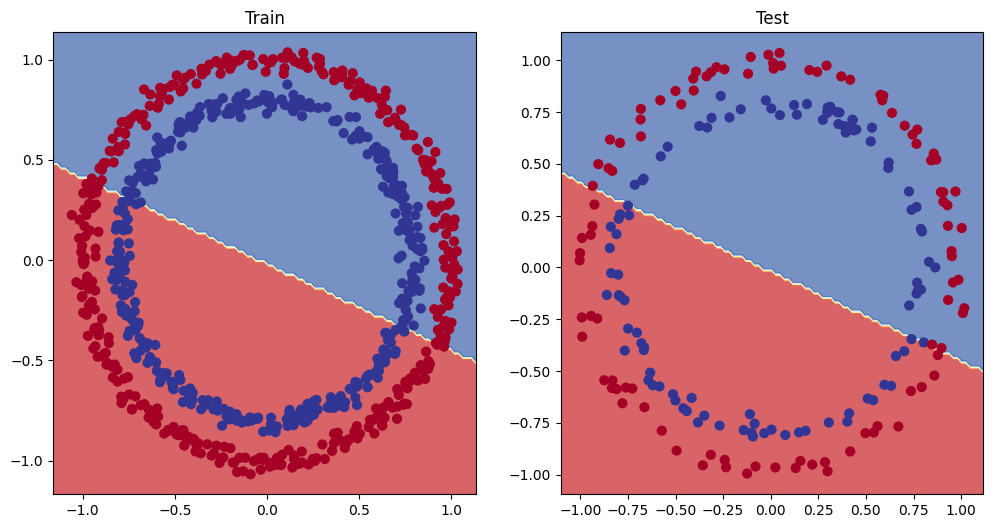

In [501]:
# Plot decisions boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving the model (from a model perspective)

- Add more layers - give the model more chances to learn about patterns in the data
- Add more hidden units - go from 5 hidden units to 10 hidden units
- Fit for longer
- Changing the activation functions
- Change the learning rate
- Change the loss function

These options are all from a model's perspective because they deal directly with the model, rather than the data.

And because there options are all values we (as machine learning engineers and data scientists) can change, they are referred as **hyperparameters**.

Let's try and improve our model by:
- Adding more hidden units: 5 -> 10
- Increase the number of layers: 2 -> 3
- Increase the number of epochs: 100 -> 1000

In [502]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [503]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [504]:
# Write a training evaluation loop for model_1

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1000

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

# Training
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_1.train()  # train mode in PyTorch sets all parameters that require gradients to require gradients

    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    # turn logits -> pred probs -> pred labels
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Calculate the loss/accuracy
    loss = loss_fn(y_logits,  # nn.BCEWithLogitsLoss expects raw logits as input
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optmizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward (backpropagation)
    loss.backward()

    # 5. Optimizer steop (gradient descent)
    optimizer.step()  # by default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

    # Testing
    model_1.eval()  # turns off different settings in the model not needed for evaluation/testing
    with torch.inference_mode():  # turns off gradient tracking & a couple more things behind the scenes
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate the test loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.2f}, Acc: {acc:.2f}% | Test loss: {test_loss}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69, Acc: 50.88% | Test loss: 0.6926146745681763, Test acc: 51.00%
Epoch: 100 | Loss: 0.69, Acc: 50.38% | Test loss: 0.6937904357910156, Test acc: 48.00%
Epoch: 200 | Loss: 0.69, Acc: 51.12% | Test loss: 0.6943727135658264, Test acc: 46.00%
Epoch: 300 | Loss: 0.69, Acc: 51.62% | Test loss: 0.6945767998695374, Test acc: 45.00%
Epoch: 400 | Loss: 0.69, Acc: 51.12% | Test loss: 0.6946452260017395, Test acc: 46.00%
Epoch: 500 | Loss: 0.69, Acc: 51.00% | Test loss: 0.6946680545806885, Test acc: 46.00%
Epoch: 600 | Loss: 0.69, Acc: 51.00% | Test loss: 0.6946756839752197, Test acc: 46.00%
Epoch: 700 | Loss: 0.69, Acc: 51.00% | Test loss: 0.6946782469749451, Test acc: 46.00%
Epoch: 800 | Loss: 0.69, Acc: 51.00% | Test loss: 0.6946790814399719, Test acc: 46.00%
Epoch: 900 | Loss: 0.69, Acc: 51.00% | Test loss: 0.6946793794631958, Test acc: 46.00%


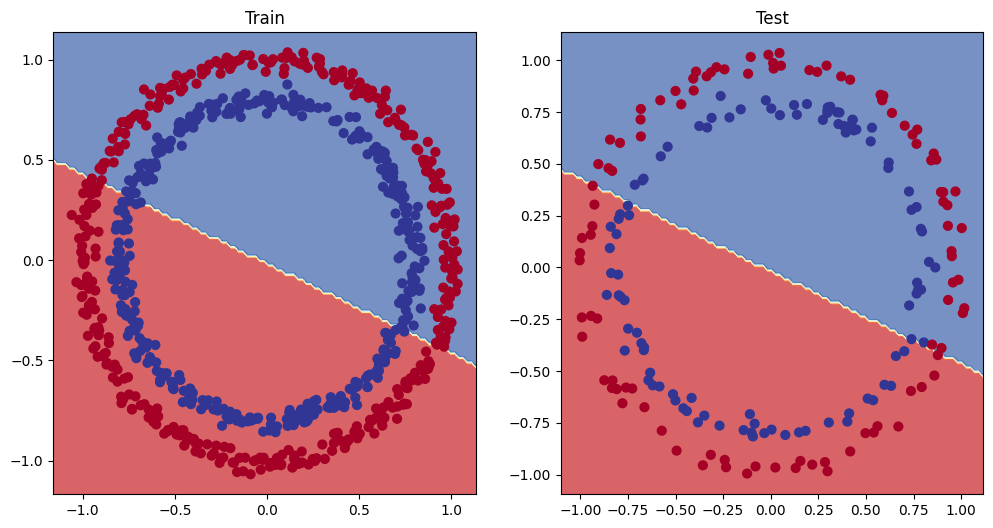

In [505]:
# Plot decisions boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot a larget problem is to test out a smaller problem

In [506]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # Linear regression formula (without epsilon)

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [507]:
# Create train and test splits

train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

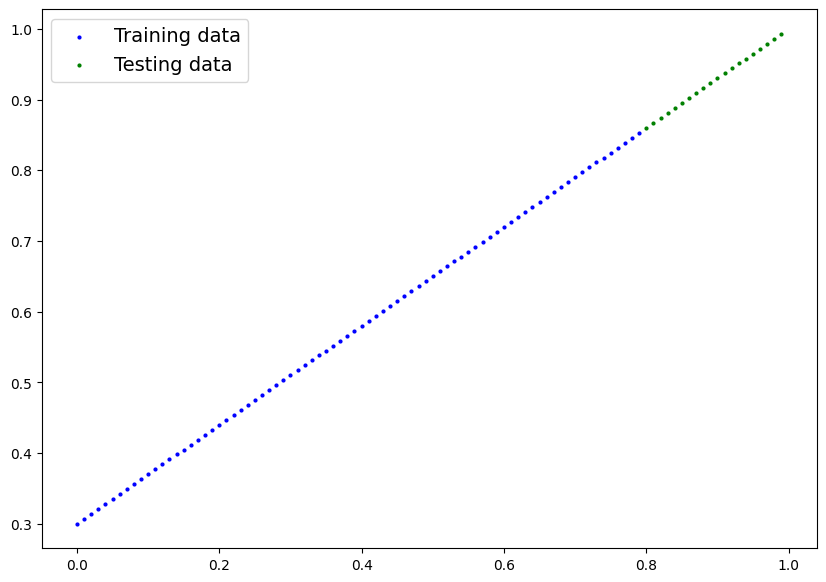

In [508]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

### 5.2 Adjusting `model_1` to fit a straight line

In [509]:
# Same architecture as model_1 (but using nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1),
).to(device)

In [510]:
# Create a loss function
loss_fn = nn.L1Loss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [511]:
# Write a training evaluation loop for model_2

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1000

# Put data to target device
X_train_regression, y_train_regression = X_train_regression.to(
    device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(
    device), y_test_regression.to(device)

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

# Training
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_2.train()  # train mode in PyTorch sets all parameters that require gradients to require gradients

    # 1. Forward pass
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred,
                   y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Testing
    model_2.eval()  # turns off different settings in the model not needed for evaluation/testing
    with torch.inference_mode():  # turns off gradient tracking & a couple more things behind the scenes
        # 1. Forward pass
        test_pred = model_2(X_test_regression)
        # 2. Calculate the test loss
        test_loss = loss_fn(test_pred,
                            y_test_regression)

    # Print out what's happening
    if epoch % 100 == 0:
        print(
            f"Epoch: {epoch} | Loss: {loss:.2f} | Test loss: {test_loss} ")

Epoch: 0 | Loss: 0.76 | Test loss: 0.9110288619995117 
Epoch: 100 | Loss: 0.03 | Test loss: 0.0008127153269015253 


Epoch: 200 | Loss: 0.03 | Test loss: 0.0020920156966894865 
Epoch: 300 | Loss: 0.02 | Test loss: 0.0030509233474731445 
Epoch: 400 | Loss: 0.02 | Test loss: 0.0034076811280101538 
Epoch: 500 | Loss: 0.02 | Test loss: 0.003872436238452792 
Epoch: 600 | Loss: 0.02 | Test loss: 0.0037890435196459293 
Epoch: 700 | Loss: 0.02 | Test loss: 0.0038133442867547274 
Epoch: 800 | Loss: 0.02 | Test loss: 0.003287237836048007 
Epoch: 900 | Loss: 0.02 | Test loss: 0.0036037624813616276 


## 6. The missing piece: non-linearity

"What patterns could you draw if you where given an infinite amount of straight and non-straight lines lines?"

Or in machine learning term, an infinite (but realy it is finite) linear and non-linear functions?

### 6.1 Recreating non-linear data (red and blue circles)

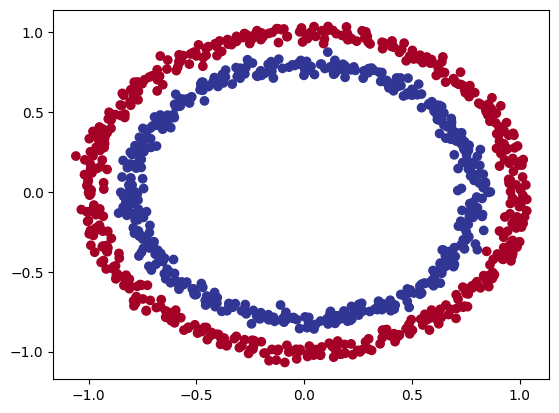

In [512]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [513]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity
- Linear: straight lines
- Non-linear: non-straight lines

Artificial neural networks are a large combination of linear (straight) and non-linear (non-straight) functions which are potentially able to find patterns in data.

In [514]:
# Build a model with non-linear activation functions
from torch import nn


class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()  # relu is a non-linear activation function

    def forward(self, x):
        # Where should we put our non-linear activation functions?
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [515]:
## Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)

### 6.4 Training a model with non-linearity

In [516]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put data to target device
X_train, y_train = X_train.to(
    device), y_train.to(device)
X_test, y_test = X_test.to(
    device), y_test.to(device)

epochs = 2000

# Training
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_3.train()  # train mode in PyTorch sets all parameters that require gradients to require gradients

    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    # logits -> prediction probabilities -> prediction labels
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Calculate the loss
    # BCEWithLogitsLoss (takes in logits as first input)
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    # Testing
    model_3.eval()  # turns off different settings in the model not needed for evaluation/testing
    with torch.inference_mode():  # turns off gradient tracking & a couple more things behind the scenes
        # 1. Forward pass
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate the test loss/acc
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}% ")

Epoch: 0 | Loss: 0.6929, Acc: 50.00% | Test loss: 0.6932, Test acc: 50.00% 


Epoch: 100 | Loss: 0.6912, Acc: 52.88% | Test loss: 0.6910, Test acc: 52.50% 
Epoch: 200 | Loss: 0.6898, Acc: 53.37% | Test loss: 0.6894, Test acc: 55.00% 
Epoch: 300 | Loss: 0.6879, Acc: 53.00% | Test loss: 0.6872, Test acc: 56.00% 
Epoch: 400 | Loss: 0.6852, Acc: 52.75% | Test loss: 0.6841, Test acc: 56.50% 
Epoch: 500 | Loss: 0.6810, Acc: 52.75% | Test loss: 0.6794, Test acc: 56.50% 
Epoch: 600 | Loss: 0.6751, Acc: 54.50% | Test loss: 0.6729, Test acc: 56.00% 
Epoch: 700 | Loss: 0.6666, Acc: 58.38% | Test loss: 0.6632, Test acc: 59.00% 
Epoch: 800 | Loss: 0.6516, Acc: 64.00% | Test loss: 0.6476, Test acc: 67.50% 
Epoch: 900 | Loss: 0.6236, Acc: 74.00% | Test loss: 0.6215, Test acc: 79.00% 
Epoch: 1000 | Loss: 0.5682, Acc: 87.75% | Test loss: 0.5738, Test acc: 86.50% 
Epoch: 1100 | Loss: 0.4815, Acc: 93.50% | Test loss: 0.4993, Test acc: 90.50% 
Epoch: 1200 | Loss: 0.3706, Acc: 97.75% | Test loss: 0.4059, Test acc: 92.00% 
Epoch: 1300 | Loss: 0.2546, Acc: 99.00% | Test loss: 0.3033, 

### 6.4 Evaluating a model trained with non-linear activation functions

In [520]:
# Makes predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

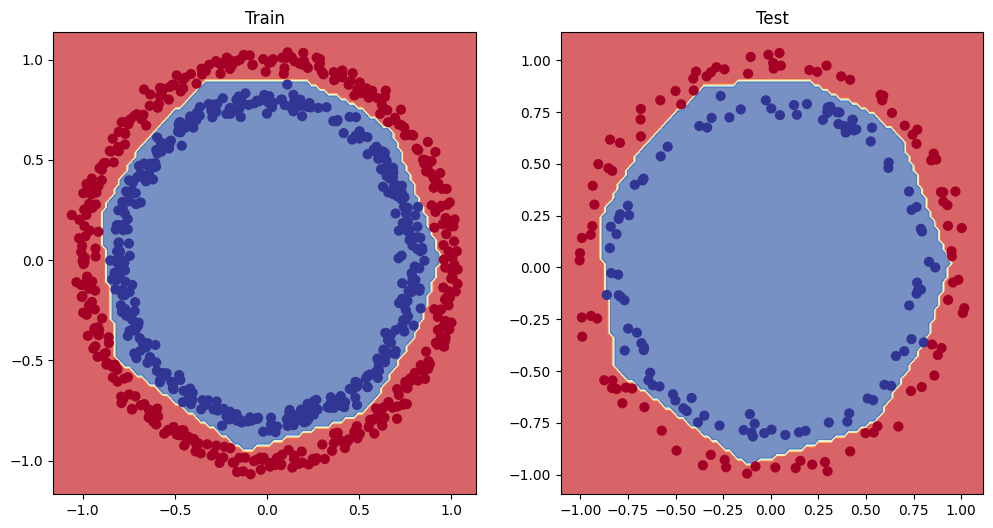

In [517]:
# Plot decisions boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)